In [ ]:
!pip uninstall -y transformers datasets numpy
!pip install transformers==4.28.1 datasets==2.10.1 numpy==1.26.4 scikit-learn --quiet


Found existing installation: transformers 4.53.3
Uninstalling transformers-4.53.3:
  Successfully uninstalled transformers-4.53.3
Found existing installation: datasets 4.0.0
Uninstalling datasets-4.0.0:
  Successfully uninstalled datasets-4.0.0
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.0/110.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 10.4 MB/s eta 0:00:00
ERROR: pip's 

# ***Mount Google Drive & Load CSV Files***

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Set your path correctly
train_path = '/content/drive/MyDrive/Train_1.csv'
test_path = '/content/drive/MyDrive/Test1.csv'
valid_path = '/content/drive/MyDrive/Valid1.csv'

train_df = pd.read_csv(train_path, )
test_df = pd.read_csv(test_path, )
val_df = pd.read_csv(valid_path, )


In [ ]:
train_df = train_df[["text", "label"]]
val_df = val_df[["text", "label"]]
test_df = test_df[["text", "label"]]


In [ ]:
train_df.shape

(35918, 5)

In [ ]:
train_df.head()

,title,text,subject,date,label
0,Kellyanne Conway’s Husband Just Publicly Bash...,So the Conway marriage just took a turn and ...,News,"June 5, 2017",0
1,JEB BUSH WANTS CONGRESS TO APPROVE AMNESTY And...,Jeb Bush just unofficially placed himself on t...,politics,"Apr 17, 2015",0
2,"Henningsen on Trump’s Foreign Policy: Russia, ...",21st Century Wire says While the US media con...,Middle-east,"November 21, 2016",0
3,"Netanyahu lauds Trump's Iran turn, sees chance...",JERUSALEM (Reuters) - Israeli Prime Minister B...,worldnews,"October 13, 2017",1
4,WATCH PRESIDENT TRUMP’S MOST SAVAGE MOMENTS….P...,Here s a compilation of President Trump s most...,politics,"May 8, 2017",0


In [ ]:
test_df.head()

,text,label
0,The recipient of the Presidential Medal of Fre...,0
1,"Nothing shady here, huh? Unbelievable!Even by ...",0
2,Republican front runner Donald Trump loves to ...,0
3,WASHINGTON (Reuters) - The Environmental Prote...,1
4,Hillary Clinton s supporters were calling cert...,0


# ***Tokenize Using mBERT***

In [ ]:
from transformers import BertTokenizer
from datasets import Dataset


In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

In [ ]:
train_ds = Dataset.from_pandas(train_df)
val_ds = Dataset.from_pandas(val_df)
test_ds = Dataset.from_pandas(test_df)


In [ ]:
def tokenize_fn(example):
    return tokenizer(example["text"], truncation=True, padding="max_length", max_length=128)

train_ds = train_ds.map(tokenize_fn, batched=True)
val_ds = val_ds.map(tokenize_fn, batched=True)
test_ds = test_ds.map(tokenize_fn, batched=True)


Map:   0%|          | 0/35918 [00:00<?, ? examples/s]

Map:   0%|          | 0/4490 [00:00<?, ? examples/s]

Map:   0%|          | 0/4490 [00:00<?, ? examples/s]

In [ ]:
train_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])


# ***Train mBERT Using Trainer***

In [ ]:
import os
import warnings
warnings.filterwarnings("ignore", message="Unable to avoid copy*")
os.environ["WANDB_DISABLED"] = "true"

from transformers import BertForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


# ***Load Model & Define Metrics***

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=3)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='macro')
    acc = accuracy_score(labels, predictions)
    return {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    do_train=True,
    do_eval=True,
    evaluation_strategy="epoch",           # evaluate every epoch ✅
    save_strategy="epoch",                 # save every epoch ✅
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    load_best_model_at_end=True,          # works now
    metric_for_best_model="f1"
)


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)


In [ ]:
trainer.train()


/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.002500,0.004999,0.999109,0.999147,0.999070,0.999107
2,0.001300,0.000047,1.000000,1.000000,1.000000,1.000000
3,0.001300,0.001086,0.999777,0.999768,0.999786,0.999777


TrainOutput(global_step=6735, training_loss=0.006749453006828039, metrics={'train_runtime': 2839.776, 'train_samples_per_second': 37.945, 'train_steps_per_second': 2.372, 'total_flos': 7087880803465728.0, 'train_loss': 0.006749453006828039, 'epoch': 3.0})

# ***Results***

In [ ]:
results = trainer.evaluate(eval_dataset=test_ds)
print("📊 Final Test Set Evaluation Results:")
print(results)


📊 Final Test Set Evaluation Results:
{'eval_loss': 3.297482180641964e-05, 'eval_accuracy': 1.0, 'eval_precision': 1.0, 'eval_recall': 1.0, 'eval_f1': 1.0, 'eval_runtime': 35.897, 'eval_samples_per_second': 125.08, 'eval_steps_per_second': 7.828, 'epoch': 3.0}


In [ ]:
trainer.save_model("/content/drive/MyDrive/fake_news_mbert_model")
tokenizer.save_pretrained("/content/drive/MyDrive/fake_news_mbert_model")


('/content/drive/MyDrive/fake_news_mbert_model/tokenizer_config.json',
 '/content/drive/MyDrive/fake_news_mbert_model/special_tokens_map.json',
 '/content/drive/MyDrive/fake_news_mbert_model/vocab.txt',
 '/content/drive/MyDrive/fake_news_mbert_model/added_tokens.json')

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from tqdm import tqdm

In [ ]:
# Assuming 'train_df' is already loaded and model/tokenizer are in memory

texts = train_df['text'].tolist()
labels = train_df['label'].astype(int).tolist()

# Tokenize only if not already tokenized
encodings = tokenizer(texts, truncation=True, padding=True, return_tensors='pt')
input_ids = encodings['input_ids'].to(device)
attention_mask = encodings['attention_mask'].to(device)
labels_tensor = torch.tensor(labels).to(device)

from torch.utils.data import TensorDataset, DataLoader

dataset = TensorDataset(input_ids, attention_mask, labels_tensor)
loader = DataLoader(dataset, batch_size=16)

# Predict
all_preds = []
all_true = []

model.eval()
with torch.no_grad():
    for batch in loader:
        input_ids_batch, attention_mask_batch, labels_batch = batch
        outputs = model(input_ids_batch, attention_mask=attention_mask_batch)
        preds = torch.argmax(outputs.logits, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_true.extend(labels_batch.cpu().numpy())


# ***Confusion Matrix (Training Data)***

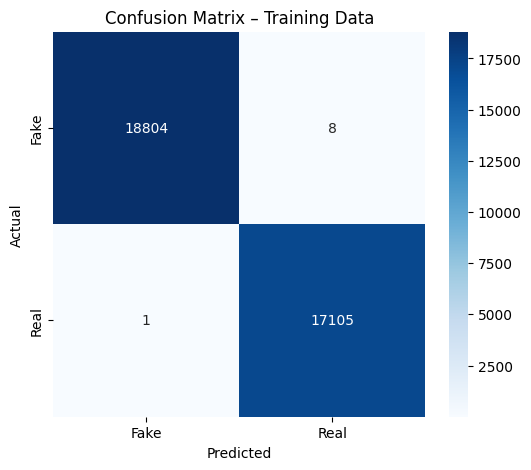

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define class labels (0 = Fake, 1 = Real)
labels = ['Fake', 'Real']

# Create confusion matrix
cm = confusion_matrix(all_true, all_preds)

# Plot using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Training Data')
plt.show()


/tmp/ipython-input-26-3556868406.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_labels, y=class_counts.values, palette='pastel')


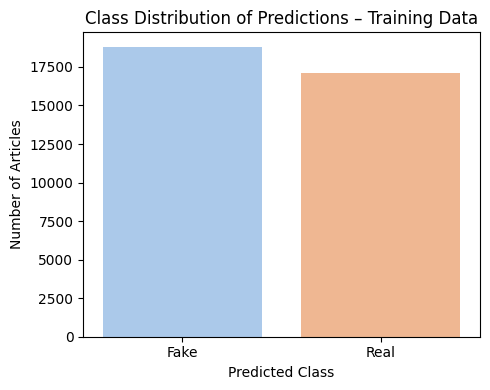

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert predictions to a pandas Series for easy plotting
pred_series = pd.Series(all_preds)

# Count occurrences of each class
class_counts = pred_series.value_counts().sort_index()
class_labels = ['Fake', 'Real']

# Plot
plt.figure(figsize=(5,4))
sns.barplot(x=class_labels, y=class_counts.values, palette='pastel')
plt.title("Class Distribution of Predictions – Training Data")
plt.xlabel("Predicted Class")
plt.ylabel("Number of Articles")
plt.tight_layout()
plt.show()


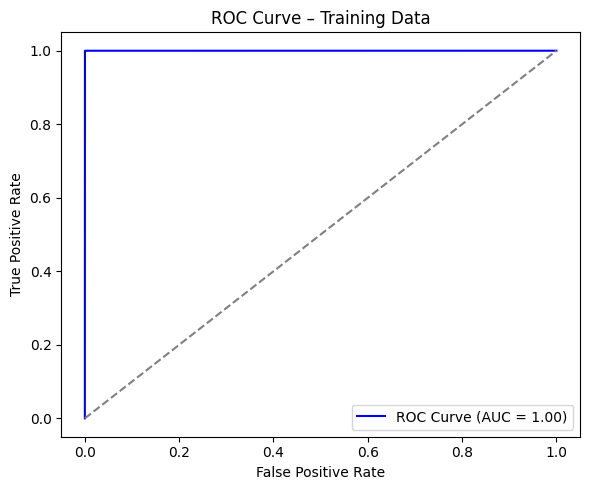

In [ ]:
from sklearn.metrics import roc_curve, auc
from torch.nn.functional import softmax
import numpy as np

# Get probability scores
all_probs = []

model.eval()
with torch.no_grad():
    for batch in loader:
        input_ids_batch, attention_mask_batch, labels_batch = batch
        outputs = model(input_ids_batch, attention_mask=attention_mask_batch)
        probs = softmax(outputs.logits, dim=1)
        all_probs.extend(probs[:, 1].cpu().numpy())  # Probability of class 1 (Real)

# ROC curve
fpr, tpr, _ = roc_curve(all_true, all_probs)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Training Data')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


# ***Classification Report***

In [ ]:
from sklearn.metrics import classification_report

# Define target names for clarity
target_names = ['Fake', 'Real']

# Generate and print the report
report = classification_report(all_true, all_preds, target_names=target_names)
print("📋 Classification Report (Training Data):\n")
print(report)


📋 Classification Report (Training Data):

              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00     18812
        Real       1.00      1.00      1.00     17106

    accuracy                           1.00     35918
   macro avg       1.00      1.00      1.00     35918
weighted avg       1.00      1.00      1.00     35918



# ***Log Loss / Cross-Entropy Loss***

In [ ]:
from sklearn.metrics import log_loss
logloss = log_loss(all_true, all_probs)  # all_probs must be class probability of class 0 and 1
print(f"Log Loss: {logloss:.4f}")


Log Loss: 0.0017


# ***Model Predictions on Test Data***

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
from transformers import AutoTokenizer
import torch

# Tokenize the test texts
test_encodings = tokenizer(
    test_df['text'].astype(str).tolist(),
    truncation=True,
    padding=True,
    return_tensors='pt'
)

# Create label tensor
test_labels_tensor = torch.tensor(test_df['label'].tolist())

# Move tensors to GPU (if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_ids = test_encodings['input_ids'].to(device)
attention_mask = test_encodings['attention_mask'].to(device)
test_labels_tensor = test_labels_tensor.to(device)

# Build test loader
test_dataset = TensorDataset(input_ids, attention_mask, test_labels_tensor)
test_loader = DataLoader(test_dataset, batch_size=16)


In [ ]:
from torch.nn.functional import softmax

model.eval()  # Set model to evaluation mode

test_preds = []
test_probs = []

with torch.no_grad():
    for batch in test_loader:
        input_ids_batch, attention_mask_batch, labels_batch = batch
        outputs = model(input_ids_batch, attention_mask=attention_mask_batch)
        probs = softmax(outputs.logits, dim=1)
        preds = torch.argmax(probs, dim=1)

        test_preds.extend(preds.cpu().numpy())
        test_probs.extend(probs[:, 1].cpu().numpy())  # Probability of class "Real"


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# True labels from test_df
true_labels = test_df['label'].tolist()

# Accuracy
acc = accuracy_score(true_labels, test_preds)
prec = precision_score(true_labels, test_preds)
rec = recall_score(true_labels, test_preds)
f1 = f1_score(true_labels, test_preds)

print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ Precision: {prec:.4f}")
print(f"✅ Recall: {rec:.4f}")
print(f"✅ F1-Score: {f1:.4f}")

# Classification report
print("\n📋 Classification Report:")
print(classification_report(true_labels, test_preds, target_names=["Fake", "Real"]))


✅ Accuracy: 0.9996
✅ Precision: 0.9991
✅ Recall: 1.0000
✅ F1-Score: 0.9995

📋 Classification Report:
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      2329
        Real       1.00      1.00      1.00      2161

    accuracy                           1.00      4490
   macro avg       1.00      1.00      1.00      4490
weighted avg       1.00      1.00      1.00      4490



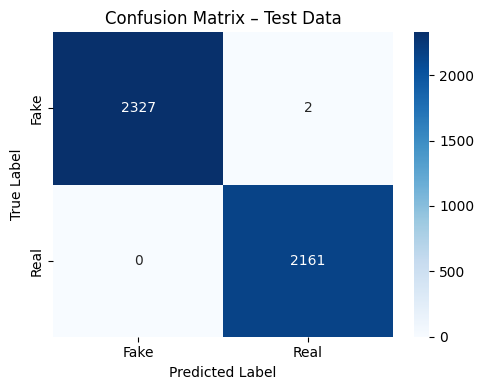

In [ ]:
cm = confusion_matrix(true_labels, test_preds)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Test Data")
plt.tight_layout()
plt.show()


In [ ]:
# Save Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Test Data")
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/confusion_matrix_test.png")
plt.close()


# ***Real World Data for SUGD_News***

In [32]:
import pandas as pd

# Load file where prediction column is already present
real_data_path = "/content/drive/MyDrive/Sugd_predic.csv"  # example
real_df = pd.read_csv(real_data_path)

real_df.head()


,Page ascore,Source title,Source url,Target url,Anchor,Text,Frame,Form,Image,First seen,Domain,title,text,date,language,prediction
0,12,Как «Радио Свобода» перепугало Таджикистан и п...,http://newreporter.org/2020/04/08/kak-radio-sv...,http://sugdnews.com/2020/04/06/maruf-hodzhiboe...,«СугдНьюс»,True,False,False,False,2025-02-07,newreporter.org,Как «Радио Свобода» перепугало Таджикистан и п...,Поздно вечером 5 апреля таджикская служба «Рад...,2020-04-08,ru,Real
1,12,Как таджикские журналисты рассказывают о людях...,https://newreporter.org/2019/10/15/kak-tadzhik...,http://sugdnews.com/2018/03/02/prestarelye-i-i...,инвалидов,True,False,False,False,2025-02-19,newreporter.org,Как таджикские журналисты рассказывают о людях...,Хорошая новость — в таджикских онлайн-медиа го...,2019-10-15,ru,Real
2,9,Фейки 2019 года: как обманывали в соцсетях Каз...,https://newreporter.org/2019/12/25/fejki-2019-...,http://sugdnews.com/2019/10/22/vich-ne-peredae...,фейки опровергать,True,False,False,False,2025-01-13,newreporter.org,Фейки 2019 года: как обманывали в соцсетях Каз...,"Как и любой другой год, 2019 оказался богат на...",2019-12-25,ru,Real
3,7,В Таджикистане вируса нет-2: чиновники против ...,https://newreporter.org/2020/04/30/v-tadzhikis...,http://sugdnews.com/2020/04/11/minzdrav-hodzhi...,сообщении,True,False,False,False,2025-04-23,newreporter.org,В Таджикистане вируса нет-2: чиновники против ...,«В эти чувствительные и решающие для страны мо...,2020-04-30,ru,Real
4,6,Как в гендерную повестку Таджикистана врываютс...,https://newreporter.org/2024/12/09/kak-v-gende...,https://sugdnews.com/2024/10/07/v-hudzhande-mi...,появилось,True,False,False,False,2025-05-21,newreporter.org,Как в гендерную повестку Таджикистана врываютс...,"Пожалуй, самые заметные новости, которые можно...",2024-12-09,ru,Fake


In [38]:
real_df.shape

(29, 16)

In [33]:
# Treat this as the true label (since it's the model's own prediction)
real_df.rename(columns={'prediction': 'label'}, inplace=True)


In [34]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")

encodings = tokenizer(list(real_df['text'].astype(str)), truncation=True, padding=True, return_tensors="pt")


In [35]:
from transformers import BertForSequenceClassification
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = BertForSequenceClassification.from_pretrained("/content/drive/MyDrive/fake_news_mbert_model")
model.to(device)
model.eval()


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [36]:
with torch.no_grad():
    input_ids = encodings['input_ids'].to(device)
    attention_mask = encodings['attention_mask'].to(device)

    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    preds = torch.argmax(logits, dim=1).cpu().numpy()


In [39]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Convert string labels to numerical labels
label_map = {'Fake': 0, 'Real': 1}
true_labels = [label_map[label] for label in real_df['label'].tolist()]  # model's own previous predictions
new_preds = preds  # model's current predictions on same data

print("Classification Report (Backlink Real-World Data)")
print(classification_report(true_labels, new_preds, target_names=["Fake", "Real"]))

# Calculate and print individual metrics
accuracy = accuracy_score(true_labels, new_preds)
precision = precision_score(true_labels, new_preds, average='weighted')
recall = recall_score(true_labels, new_preds, average='weighted')
f1 = f1_score(true_labels, new_preds, average='weighted')

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-Score (weighted): {f1:.4f}")

Classification Report (Backlink Real-World Data)
              precision    recall  f1-score   support

        Fake       1.00      0.83      0.91        18
        Real       0.79      1.00      0.88        11

    accuracy                           0.90        29
   macro avg       0.89      0.92      0.89        29
weighted avg       0.92      0.90      0.90        29


Accuracy: 0.8966
Precision (weighted): 0.9187
Recall (weighted): 0.8966
F1-Score (weighted): 0.8981


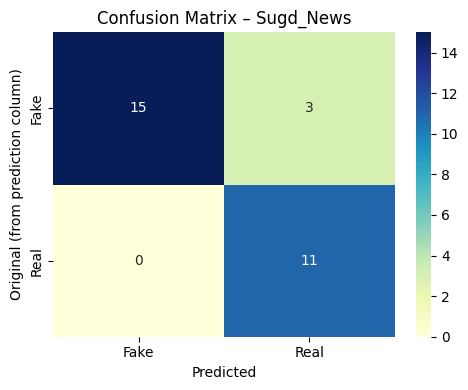

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(true_labels, new_preds)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title("Confusion Matrix – Sugd_News")
plt.xlabel("Predicted")
plt.ylabel("Original (from prediction column)")
plt.tight_layout()
plt.show()


# ***Real World Data for rt_News***

In [ ]:
import pandas as pd

# Load file where prediction column is already present
real_data_path = "/content/drive/MyDrive/rt_news_3.csv"  # example
real_df = pd.read_csv(real_data_path)

real_df.head()


,Page ascore,Source title,Source url,Target url,Anchor,Text,Frame,Form,Image,First seen,Domain,title,text,date,language,prediction
0,80,Ð¡ÐµÐ¼Ð¸Ð½Ð°Ñ€ Ð´Ð»Ñ ÑÑƒÐ´ÐµÐ¹ Ð¿Ð¾ Ð´Ð¸ÑÑ†...,https://rkf.org.ru/seminar-dlja-sudej-po-disci...,https://russian.rt.com/russia/news/1441126-kin...,"ÐšÐ˜ÐÐžÐ›ÐžÐ“ Ð ÐÐ¡Ð¡ÐšÐÐ—ÐÐ›, ÐšÐÐš Ð¡Ð•...",False,False,False,True,3/3/2025,rkf.org.ru,Ð¡ÐµÐ¼Ð¸Ð½Ð°Ñ€ Ð´Ð»Ñ ÑÑƒÐ´ÐµÐ¹ Ð¿Ð¾ Ð´Ð¸ÑÑ†...,Ð£Ð²Ð°Ð¶Ð°ÐµÐ¼Ñ‹Ðµ ÐºÐ¾Ð»Ð»ÐµÐ³Ð¸!\n\n28 Ñ„ÐµÐ...,2025-02-03 16:30:00+00:00,ru,Fake
1,72,Ð¤Ð¸Ñ†Ð¾ Ð¸ Ð’ÑƒÑ‡Ð¸Ñ‡ Ð² ÐœÐ¾ÑÐºÐ²Ðµ: Ð¿Ð¾Ñ...,https://vfokuse.mail.ru/article/kak-lidery-ser...,https://russian.rt.com/world/news/1475492-prem...,Ð·Ð°Ð¿Ñ€ÐµÑ‚Ð¸Ð»Ð¸,True,False,False,False,5/11/2025,vfokuse.mail.ru,ÐšÐ°ÐºÐ¸Ð¼Ð¸ Ð´Ð¾Ñ€Ð¾Ð³Ð°Ð¼Ð¸ Ð»Ð¸Ð´ÐµÑ€Ñ‹ Ð¡Ð...,â€” Ð¡ÐµÑ€Ð±Ð¸Ñ Ð²ÐµÐ´ÐµÑ‚ Ð¿ÐµÑ€ÐµÐ³Ð¾Ð²Ð¾Ñ€...,2025-05-09 18:43:58+03:00,ru,Real
2,69,FBI warns citizens about â€˜nuclear incidentâ€...,https://theuglytruth.xyz/fbi-warns-citizens-ab...,https://www.rt.com/news/611697-us-nuclear-exer...,Russia Today,True,False,False,False,2/5/2025,theuglytruth.xyz,FBI warns citizens about â€˜nuclear incidentâ€...,Multi-agency exercise simulating a â€˜nuclear ...,2025-01-27 16:15:09+00:00,en,Real
3,69,EU tells citizens to stock up for nuclear disa...,https://theuglytruth.xyz/eu-tells-citizens-to-...,https://rt.com/news/606792-eu-stockpile-goods/,Russia Today,True,False,False,False,2/20/2025,theuglytruth.xyz,EU tells citizens to stock up for nuclear disa...,Households should also be prepared for cyberat...,2024-10-31 14:11:05+00:00,en,Real
4,68,Putin a Si Å¤in-pching by mohli uzavÅ™Ã­t velk...,https://voxpopuliblog.net/putin-a-si-tin-pchin...,https://www.rt.com/news/470148-russia-china-mi...,strategickou vojensko-technickou spoluprÃ¡ci,True,False,False,False,5/8/2025,voxpopuliblog.net,Putin a Si Å¤in-pching by mohli uzavÅ™Ã­t velk...,Putin by mohl potÅ™ebovat Si Å¤in-pchingovu po...,2025-05-07 01:02:18+00:00,cs,Fake


In [42]:
real_df.shape

(29, 16)

In [ ]:
# Treat this as the true label (since it's the model's own prediction)
real_df.rename(columns={'prediction': 'label'}, inplace=True)


In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")

encodings = tokenizer(list(real_df['text'].astype(str)), truncation=True, padding=True, return_tensors="pt")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

In [ ]:
from transformers import BertForSequenceClassification
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = BertForSequenceClassification.from_pretrained("/content/drive/MyDrive/fake_news_mbert_model")
model.to(device)
model.eval()


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

In [ ]:
import torch
torch.cuda.empty_cache()
torch.cuda.reset_peak_memory_stats()


In [ ]:
with torch.no_grad():
    input_ids = encodings['input_ids'].to(device)
    attention_mask = encodings['attention_mask'].to(device)

    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    preds = torch.argmax(logits, dim=1).cpu().numpy()


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Convert string labels to numerical labels
label_map = {'Fake': 0, 'Real': 1}
true_labels = [label_map[label] for label in real_df['label'].tolist()]  # model's own previous predictions
new_preds = preds  # model's current predictions on same data

print("Classification Report (Backlink Real-World Data)")
print(classification_report(true_labels, new_preds, target_names=["Fake", "Real"]))

# Calculate and print individual metrics
accuracy = accuracy_score(true_labels, new_preds)
precision = precision_score(true_labels, new_preds, average='weighted')
recall = recall_score(true_labels, new_preds, average='weighted')
f1 = f1_score(true_labels, new_preds, average='weighted')

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-Score (weighted): {f1:.4f}")

Classification Report (Backlink Real-World Data)
              precision    recall  f1-score   support

        Fake       0.42      0.56      0.48         9
        Real       0.67      0.53      0.59        15

    accuracy                           0.54        24
   macro avg       0.54      0.54      0.53        24
weighted avg       0.57      0.54      0.55        24


Accuracy: 0.5417
Precision (weighted): 0.5729
Recall (weighted): 0.5417
F1-Score (weighted): 0.5489


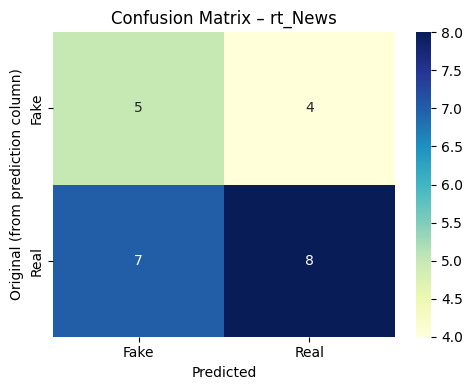

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(true_labels, new_preds)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title("Confusion Matrix – rt_News")
plt.xlabel("Predicted")
plt.ylabel("Original (from prediction column)")
plt.tight_layout()
plt.show()


# ***Real World Data for Euro_News***

In [2]:
import pandas as pd

# Load file where prediction column is already present
real_data_path = "/content/drive/MyDrive/Euro_predic_1.csv"  # example
real_df = pd.read_csv(real_data_path)

real_df.head()


,Page ascore,Source title,Source url,Target url,Anchor,Text,Frame,Form,Image,First seen,Domain,title,text,date,language,prediction
0,49,U.S. Adds Al-Qaeda in the Indian Subcontinent ...,https://www.breitbart.com/national-security/20...,http://www.euronews.com/newswires/3213771-home...,Reuters,True,False,False,False,5/14/2025,breitbart.com,U.S. Adds Al-Qaeda in the Indian Subcontinent ...,"WASHINGTON, D.C. â€” The U.S. Department of St...",7/2/2016 0:00,en,Real
1,49,Ð’ Ð˜Ñ‚Ð°Ð»Ð¸Ð¸ Ð²Ð²ÐµÐ»Ð¸ ÑˆÑ‚Ñ€Ð°Ñ„Ñ‹ Ð´Ð¾ 6...,https://ru.euronews.com/2024/01/19/italy-says-...,https://www.euronews.com/,BHS,True,False,False,False,3/26/2025,ru.euronews.com,Ð’ Ð˜Ñ‚Ð°Ð»Ð¸Ð¸ Ð²Ð²ÐµÐ»Ð¸ ÑˆÑ‚Ñ€Ð°Ñ„Ñ‹ Ð´Ð¾ 6...,Ð Ð•ÐšÐ›ÐÐœÐ\n\nÐ˜Ñ‚Ð°Ð»ÑŒÑÐ½Ñ†Ð°Ð¼ Ð±Ð¾Ð»Ñ...,1/19/2024 0:00,ru,Fake
2,49,Bottled water contains 100 times more plastic ...,https://www.euronews.com/green/2024/01/09/bott...,https://www.euronews.com/,BHS,True,False,False,False,3/13/2025,euronews.com,Bottled water contains 100 times more plastic ...,ADVERTISEMENT\n\nThe average litre of bottled ...,1/9/2024 0:00,en,Fake
3,49,Video. Latest news bulletin | August 12th â€“ ...,https://www.euronews.com/video/2024/08/12/late...,https://www.euronews.com/,BHS,True,False,False,False,3/5/2025,euronews.com,Video. Latest news bulletin | August 12th â€“ ...,Water Matters\n\nEurope's water is under incre...,8/12/2024 0:00,en,Fake
4,49,La pasiÃ³n mÃ­stica: El jefe de la doctrina de...,https://es.euronews.com/cultura/2024/01/11/la-...,https://www.euronews.com/,BHS,True,False,False,False,3/13/2025,es.euronews.com,La pasiÃ³n mÃ­stica: El jefe de la doctrina de...,PUBLICIDAD\n\nEl reciÃ©n nombrado jefe de doct...,1/11/2024 0:00,es,Fake


In [3]:
real_df.shape

(28, 16)

In [4]:
# Treat this as the true label (since it's the model's own prediction)
real_df.rename(columns={'prediction': 'label'}, inplace=True)


In [5]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")

encodings = tokenizer(list(real_df['text'].astype(str)), truncation=True, padding=True, return_tensors="pt")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

In [8]:
from transformers import BertForSequenceClassification
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = BertForSequenceClassification.from_pretrained("/content/drive/MyDrive/fake_news_mbert_model")
model.to(device)
model.eval()


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [9]:
import torch
torch.cuda.empty_cache()
torch.cuda.reset_peak_memory_stats()


In [10]:
with torch.no_grad():
    input_ids = encodings['input_ids'].to(device)
    attention_mask = encodings['attention_mask'].to(device)

    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    preds = torch.argmax(logits, dim=1).cpu().numpy()


In [11]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Convert string labels to numerical labels
label_map = {'Fake': 0, 'Real': 1}
true_labels = [label_map[label] for label in real_df['label'].tolist()]  # model's own previous predictions
new_preds = preds  # model's current predictions on same data

print("Classification Report (Backlink Real-World Data)")
print(classification_report(true_labels, new_preds, target_names=["Fake", "Real"]))

# Calculate and print individual metrics
accuracy = accuracy_score(true_labels, new_preds)
precision = precision_score(true_labels, new_preds, average='weighted')
recall = recall_score(true_labels, new_preds, average='weighted')
f1 = f1_score(true_labels, new_preds, average='weighted')

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-Score (weighted): {f1:.4f}")

Classification Report (Backlink Real-World Data)
              precision    recall  f1-score   support

        Fake       0.83      0.50      0.62        20
        Real       0.38      0.75      0.50         8

    accuracy                           0.57        28
   macro avg       0.60      0.62      0.56        28
weighted avg       0.70      0.57      0.59        28


Accuracy: 0.5714
Precision (weighted): 0.7024
Recall (weighted): 0.5714
F1-Score (weighted): 0.5893


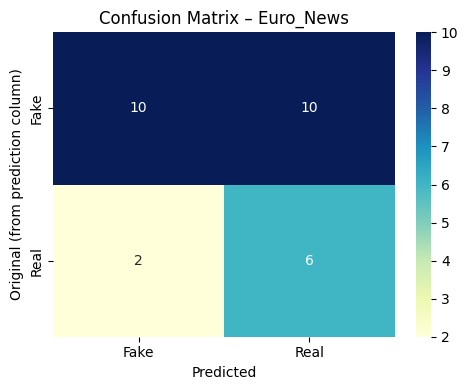

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(true_labels, new_preds)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title("Confusion Matrix – Euro_News")
plt.xlabel("Predicted")
plt.ylabel("Original (from prediction column)")
plt.tight_layout()
plt.show()


# ***Real World Data for gt_News***

In [15]:
import pandas as pd

# Load file where prediction column is already present
real_data_path = "/content/drive/MyDrive/gt_news_1.csv"  # example
real_df = pd.read_csv(real_data_path)

real_df.head()


,Page ascore,Source title,Source url,Target url,Anchor,Text,Frame,Form,Image,First seen,Domain,title,text,date,language,prediction
0,80,Ð¡ÐµÐ¼Ð¸Ð½Ð°Ñ€ Ð´Ð»Ñ ÑÑƒÐ´ÐµÐ¹ Ð¿Ð¾ Ð´Ð¸ÑÑ†...,https://rkf.org.ru/seminar-dlja-sudej-po-disci...,https://russian.rt.com/russia/news/1441126-kin...,"ÐšÐ˜ÐÐžÐ›ÐžÐ“ Ð ÐÐ¡Ð¡ÐšÐÐ—ÐÐ›, ÐšÐÐš Ð¡Ð•...",False,False,False,True,3/3/2025,rkf.org.ru,Ð¡ÐµÐ¼Ð¸Ð½Ð°Ñ€ Ð´Ð»Ñ ÑÑƒÐ´ÐµÐ¹ Ð¿Ð¾ Ð´Ð¸ÑÑ†...,Ð£Ð²Ð°Ð¶Ð°ÐµÐ¼Ñ‹Ðµ ÐºÐ¾Ð»Ð»ÐµÐ³Ð¸!\n\n28 Ñ„ÐµÐ...,2025-02-03 16:30:00+00:00,ru,Fake
1,72,Ð¤Ð¸Ñ†Ð¾ Ð¸ Ð’ÑƒÑ‡Ð¸Ñ‡ Ð² ÐœÐ¾ÑÐºÐ²Ðµ: Ð¿Ð¾Ñ...,https://vfokuse.mail.ru/article/kak-lidery-ser...,https://russian.rt.com/world/news/1475492-prem...,Ð·Ð°Ð¿Ñ€ÐµÑ‚Ð¸Ð»Ð¸,True,False,False,False,5/11/2025,vfokuse.mail.ru,ÐšÐ°ÐºÐ¸Ð¼Ð¸ Ð´Ð¾Ñ€Ð¾Ð³Ð°Ð¼Ð¸ Ð»Ð¸Ð´ÐµÑ€Ñ‹ Ð¡Ð...,â€” Ð¡ÐµÑ€Ð±Ð¸Ñ Ð²ÐµÐ´ÐµÑ‚ Ð¿ÐµÑ€ÐµÐ³Ð¾Ð²Ð¾Ñ€...,2025-05-09 18:43:58+03:00,ru,Real
2,69,FBI warns citizens about â€˜nuclear incidentâ€...,https://theuglytruth.xyz/fbi-warns-citizens-ab...,https://www.rt.com/news/611697-us-nuclear-exer...,Russia Today,True,False,False,False,2/5/2025,theuglytruth.xyz,FBI warns citizens about â€˜nuclear incidentâ€...,Multi-agency exercise simulating a â€˜nuclear ...,2025-01-27 16:15:09+00:00,en,Real
3,69,EU tells citizens to stock up for nuclear disa...,https://theuglytruth.xyz/eu-tells-citizens-to-...,https://rt.com/news/606792-eu-stockpile-goods/,Russia Today,True,False,False,False,2/20/2025,theuglytruth.xyz,EU tells citizens to stock up for nuclear disa...,Households should also be prepared for cyberat...,2024-10-31 14:11:05+00:00,en,Real
4,68,Putin a Si Å¤in-pching by mohli uzavÅ™Ã­t velk...,https://voxpopuliblog.net/putin-a-si-tin-pchin...,https://www.rt.com/news/470148-russia-china-mi...,strategickou vojensko-technickou spoluprÃ¡ci,True,False,False,False,5/8/2025,voxpopuliblog.net,Putin a Si Å¤in-pching by mohli uzavÅ™Ã­t velk...,Putin by mohl potÅ™ebovat Si Å¤in-pchingovu po...,2025-05-07 01:02:18+00:00,cs,Fake


In [16]:
real_df.shape

(29, 16)

In [17]:
# Treat this as the true label (since it's the model's own prediction)
real_df.rename(columns={'prediction': 'label'}, inplace=True)


In [18]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")

encodings = tokenizer(list(real_df['text'].astype(str)), truncation=True, padding=True, return_tensors="pt")


In [19]:
from transformers import BertForSequenceClassification
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = BertForSequenceClassification.from_pretrained("/content/drive/MyDrive/fake_news_mbert_model")
model.to(device)
model.eval()


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [20]:
with torch.no_grad():
    input_ids = encodings['input_ids'].to(device)
    attention_mask = encodings['attention_mask'].to(device)

    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    preds = torch.argmax(logits, dim=1).cpu().numpy()


In [21]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Convert string labels to numerical labels
label_map = {'Fake': 0, 'Real': 1}
true_labels = [label_map[label] for label in real_df['label'].tolist()]  # model's own previous predictions
new_preds = preds  # model's current predictions on same data

print("Classification Report (Backlink Real-World Data)")
print(classification_report(true_labels, new_preds, target_names=["Fake", "Real"]))

# Calculate and print individual metrics
accuracy = accuracy_score(true_labels, new_preds)
precision = precision_score(true_labels, new_preds, average='weighted')
recall = recall_score(true_labels, new_preds, average='weighted')
f1 = f1_score(true_labels, new_preds, average='weighted')

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-Score (weighted): {f1:.4f}")

Classification Report (Backlink Real-World Data)
              precision    recall  f1-score   support

        Fake       0.36      0.45      0.40        11
        Real       0.60      0.50      0.55        18

    accuracy                           0.48        29
   macro avg       0.48      0.48      0.47        29
weighted avg       0.51      0.48      0.49        29


Accuracy: 0.4828
Precision (weighted): 0.5079
Recall (weighted): 0.4828
F1-Score (weighted): 0.4903


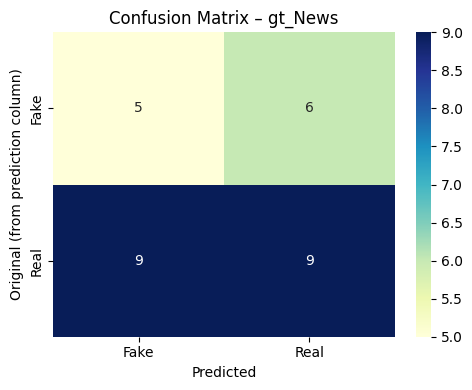

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(true_labels, new_preds)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title("Confusion Matrix – gt_News")
plt.xlabel("Predicted")
plt.ylabel("Original (from prediction column)")
plt.tight_layout()
plt.show()


# ***Real World Data for Unian_News***

In [24]:
import pandas as pd

# Load file where prediction column is already present
real_data_path = "/content/drive/MyDrive/Inian_Pred_1.csv"  # example
real_df = pd.read_csv(real_data_path)

real_df.head()


,Page ascore,Source title,Source url,Target url,Anchor,Text,Frame,Form,Image,First seen,Domain,title,text,date,language,prediction
0,55,Coronavirus: The UN secretary wants a global c...,https://www.usatoday.com/story/news/world/2020...,https://www.unian.info/war/10932227-mp-ukraine...,Ukraine,True,False,False,False,1/6/2025,usatoday.com,'War and disease travel together': Why the pan...,WASHINGTON â€“ When the head of the United Nat...,4/28/2020 0:00,en,Real
1,52,"Briten, NiederlÃ¤nder und Deutsche provozieren...",https://clausstille.blog/2021/07/05/briten-nie...,https://www.unian.info/politics/sea-breeze-202...,ausdrÃ¼cklich das Ziel,True,False,False,False,1/25/2025,clausstille.blog,"Briten, NiederlÃ¤nder und Deutsche provozieren...",Von Friedhelm Klinkhammer und Volker BrÃ¤utiga...,7/5/2021 0:00,de,Real
2,50,Brexit: Parliament Tethers Britain to a Failin...,https://off-guardian.org/2019/10/20/brexit-par...,https://www.unian.info/world/10256100-hungary-...,remove Hungaryâ€™s voting rights,True,False,False,False,3/10/2025,off-guardian.org,Brexit: Parliament Tethers Britain to a Failin...,Brexit isnâ€™t going to happen. Left or Right ...,10/20/2019 0:00,en,Real
3,37,Kannatan Suomen Nato-jÃ¤senyyttÃ¤ | dust/bones...,https://riikkapurra.net/2022/03/29/kannatan-su...,https://photo.unian.info/theme/71059-zustrich-...,https://photo.unian.info/theme/71059-zustrich-...,True,False,False,False,2/10/2025,riikkapurra.net,Kannatan Suomen Nato-jÃ¤senyyttÃ¤,Olen halunnut tÃ¤hÃ¤n saakka pidÃ¤ttÃ¤ytyÃ¤ om...,3/29/2022 0:00,fi,Fake
4,34,Multicultural Galicia in American Popular Memo...,https://ejournals.eu/czasopismo/rocznik-przemy...,https://www.unian.info/,https://www.unian.info/,True,False,False,False,5/22/2025,ejournals.eu,Multicultural Galicia in American Popular Memo...,Niniejszy artykuÅ‚ dotyczy amerykaÅ„skiego pos...,7/12/2025 0:00,pl,Fake


In [31]:
real_df.shape

(29, 16)

In [25]:
# Treat this as the true label (since it's the model's own prediction)
real_df.rename(columns={'prediction': 'label'}, inplace=True)


In [26]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")

encodings = tokenizer(list(real_df['text'].astype(str)), truncation=True, padding=True, return_tensors="pt")


In [27]:
from transformers import BertForSequenceClassification
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = BertForSequenceClassification.from_pretrained("/content/drive/MyDrive/fake_news_mbert_model")
model.to(device)
model.eval()


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [28]:
with torch.no_grad():
    input_ids = encodings['input_ids'].to(device)
    attention_mask = encodings['attention_mask'].to(device)

    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    preds = torch.argmax(logits, dim=1).cpu().numpy()


In [29]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Convert string labels to numerical labels
label_map = {'Fake': 0, 'Real': 1}
true_labels = [label_map[label] for label in real_df['label'].tolist()]  # model's own previous predictions
new_preds = preds  # model's current predictions on same data

print("Classification Report (Backlink Real-World Data)")
print(classification_report(true_labels, new_preds, target_names=["Fake", "Real"]))

# Calculate and print individual metrics
accuracy = accuracy_score(true_labels, new_preds)
precision = precision_score(true_labels, new_preds, average='weighted')
recall = recall_score(true_labels, new_preds, average='weighted')
f1 = f1_score(true_labels, new_preds, average='weighted')

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-Score (weighted): {f1:.4f}")

Classification Report (Backlink Real-World Data)
              precision    recall  f1-score   support

        Fake       0.38      0.43      0.40         7
        Real       0.81      0.77      0.79        22

    accuracy                           0.69        29
   macro avg       0.59      0.60      0.60        29
weighted avg       0.70      0.69      0.70        29


Accuracy: 0.6897
Precision (weighted): 0.7046
Recall (weighted): 0.6897
F1-Score (weighted): 0.6964


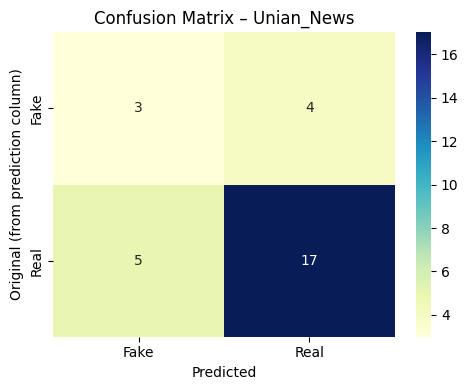

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(true_labels, new_preds)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title("Confusion Matrix – Unian_News")
plt.xlabel("Predicted")
plt.ylabel("Original (from prediction column)")
plt.tight_layout()
plt.show()


# ***Classify Articles from Phase 1 (Optional)***

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/sdg_news_p_cleaned.csv')
# Extract the 'text' column (drop missing entries)
texts = df['text'].dropna().tolist()


In [ ]:
encoded_inputs = tokenizer(
    texts,
    truncation=True,
    padding="max_length",
    max_length=128,
    return_tensors="pt"
)


In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
encoded_inputs = {k: v.to(device) for k, v in encoded_inputs.items()}

model.eval()
with torch.no_grad():
    outputs = model(**encoded_inputs)
    predictions = torch.argmax(outputs.logits, dim=1)


# ***# Predictions***

In [ ]:
# Step 1: Convert prediction labels to text
label_map = {0: 0,  1: 1}
predicted_labels = [label_map[int(p)] for p in predictions]

In [ ]:
# Step 2: Keep only rows with non-null text
df_clean = df[df["text"].notna()].copy()
df_clean["prediction"] = predicted_labels

In [ ]:
# Step 3: Save to new CSV in Google Drive
output_path = "/content/drive/MyDrive/Sugd_predic_2.csv"
df_clean.to_csv(output_path, index=False)

In [ ]:
print(f"✅ Predictions saved to:\n{output_path}")

✅ Predictions saved to:
/content/drive/MyDrive/Sugd_predic_2.csv


/tmp/ipython-input-44-3369908567.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df[metric_name], palette='viridis')


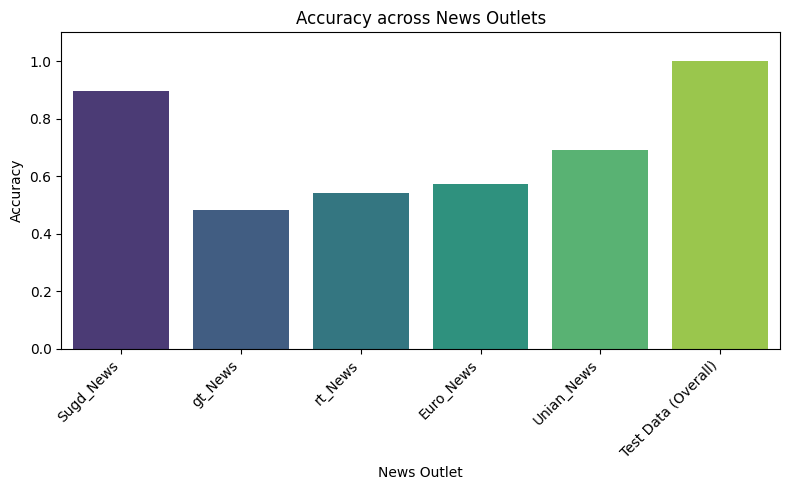

/tmp/ipython-input-44-3369908567.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df[metric_name], palette='viridis')


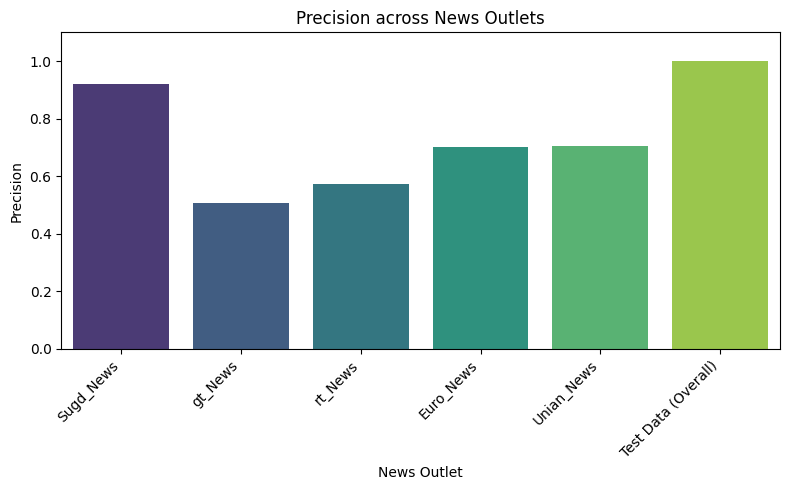

/tmp/ipython-input-44-3369908567.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df[metric_name], palette='viridis')


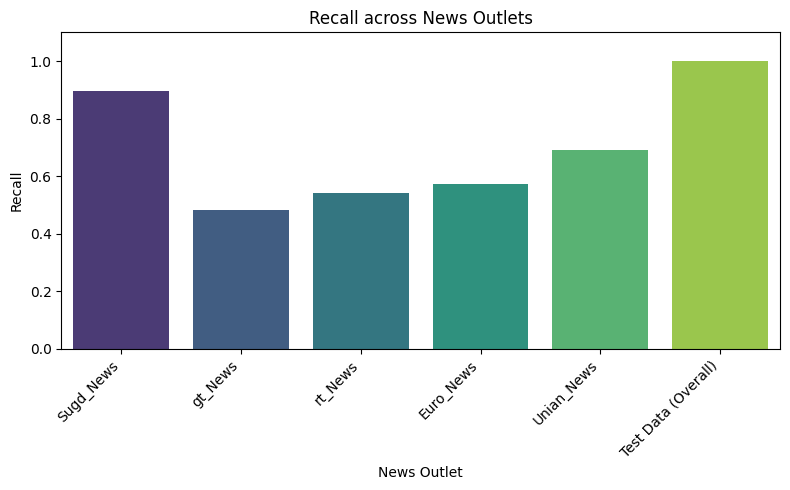

/tmp/ipython-input-44-3369908567.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df[metric_name], palette='viridis')


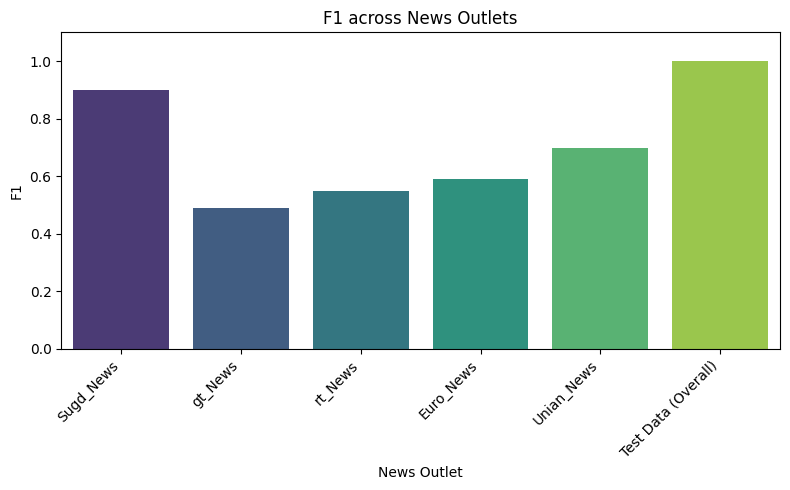

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract the metrics from the classification reports
# You can manually input these values from the printed reports
metrics = {
    'Sugd_News': {'accuracy': 0.8966, 'precision': 0.9187, 'recall': 0.8966, 'f1': 0.8981},
    'gt_News': {'accuracy': 0.4828, 'precision': 0.5079, 'recall': 0.4828, 'f1': 0.4903},
    'rt_News': {'accuracy': 0.5417, 'precision': 0.5729, 'recall': 0.5417, 'f1': 0.5489},
    'Euro_News': {'accuracy': 0.5714, 'precision': 0.7024, 'recall': 0.5714, 'f1': 0.5893},
    'Unian_News': {'accuracy': 0.6897, 'precision': 0.7046, 'recall': 0.6897, 'f1': 0.6964},
    'Test Data (Overall)': {'accuracy': 0.9996, 'precision': 0.9991, 'recall': 1.0000, 'f1': 0.9995}
}

df_metrics = pd.DataFrame(metrics).T

# Plotting function
def plot_metric(df, metric_name):
    plt.figure(figsize=(8, 5))
    sns.barplot(x=df.index, y=df[metric_name], palette='viridis')
    plt.title(f'{metric_name.capitalize()} across News Outlets')
    plt.xlabel('News Outlet')
    plt.ylabel(metric_name.capitalize())
    plt.ylim(0, 1.1)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Generate plots for each metric
plot_metric(df_metrics, 'accuracy')
plot_metric(df_metrics, 'precision')
plot_metric(df_metrics, 'recall')
plot_metric(df_metrics, 'f1')